In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from sklearn.model_selection import train_test_split

In [0]:
'''
  The function generates random periodic waveforms using 10 Fourier coefficients
  Output: b array of 6 random coefficients
          fx array of size 120 for corresponding waveform between 0 and pi
'''
def waveform_gen():
  b = np.random.rand(10)
  x = np.linspace(0,2*np.pi,120)
  fx = np.zeros_like(x)
  n = 1
  L = 2*np.pi
  for i in b:
    fx += i*np.sin(n*np.pi*x/L)
    n+=1
  return b,fx

In [0]:
'''
Generate data for training, testing and validation. Generate 1000 random waveforms,
data is stored in a .data file, with first 120 entries of each row the waveform data
and the last 6 the corresponding Fourier coefficients
'''
coef,f = waveform_gen()
c = np.copy(coef)
vect = np.concatenate((f,coef))
i = 10000
data = np.zeros((10000,np.size(vect)))
data[0,:] = vect
for j in range (1,i):
  coef,f = waveform_gen()
  data[j,:] = np.concatenate((f,coef))
np.savetxt("datafile.data", data, delimiter=",")

Epoch 1/100
92/92 [==============================] - 0s 1ms/step - loss: 0.1893 - acc: 0.4921
Epoch 2/100
92/92 [==============================] - 0s 1ms/step - loss: 4.3430e-04 - acc: 0.9259
Epoch 3/100
92/92 [==============================] - 0s 2ms/step - loss: 4.1492e-08 - acc: 0.9992
Epoch 4/100
92/92 [==============================] - 0s 2ms/step - loss: 2.7679e-12 - acc: 1.0000
Epoch 5/100
92/92 [==============================] - 0s 2ms/step - loss: 1.3566e-13 - acc: 1.0000
Epoch 6/100
92/92 [==============================] - 0s 2ms/step - loss: 1.2429e-13 - acc: 1.0000
Epoch 7/100
92/92 [==============================] - 0s 2ms/step - loss: 1.2391e-13 - acc: 1.0000
Epoch 8/100
92/92 [==============================] - 0s 2ms/step - loss: 1.2169e-13 - acc: 1.0000
Epoch 9/100
92/92 [==============================] - 0s 2ms/step - loss: 1.2089e-13 - acc: 1.0000
Epoch 10/100
92/92 [==============================] - 0s 2ms/step - loss: 1.2148e-13 - acc: 1.0000
Epoch 11/100
92/92 [===

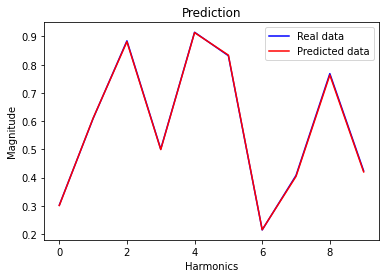

In [0]:
import matplotlib.pyplot as plt
# Importing the dataset
dataset = np.genfromtxt("datafile.data", delimiter=',')
X = dataset[:, :-10]
y = dataset[:, -10:]

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.08, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, input_dim = 120))

# Adding the second hidden layer
model.add(Dense(units = 32))

# Adding the third hidden layer
model.add(Dense(units = 32))

# Adding the output layer

model.add(Dense(units = 10))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error' ,  metrics=['acc'])

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 100, epochs = 100)

y_pred = model.predict(X_test)

plt.plot(y_test[2,:], color = 'blue', label = 'Real data')
plt.plot(y_pred[2,:], color = 'red', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.ylabel('Magnitude')
plt.xlabel('Harmonics')
plt.show()